[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-1-911696413b73>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


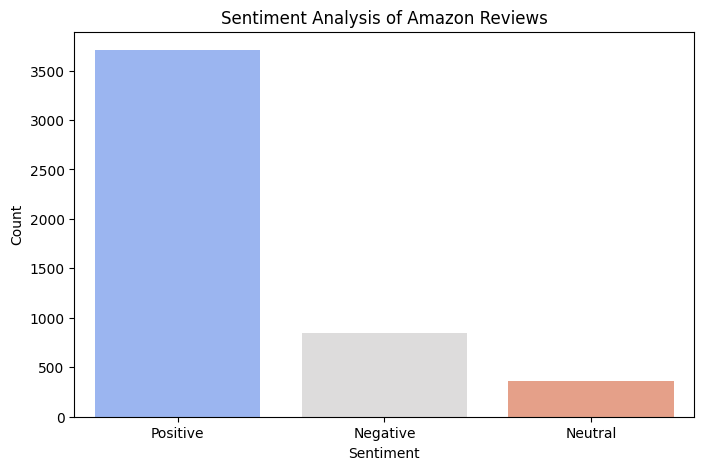

,reviewText,sentiment_score,sentiment_label
0,No issues.,-0.2960,Negative
1,"Purchased this for my device, it worked as adv...",-0.2960,Negative
2,it works as expected. I should have sprung for...,-0.3089,Negative
3,This think has worked out great.Had a diff. br...,0.7081,Positive
4,"Bought it with Retail Packaging, arrived legit...",0.7087,Positive
5,It's mini storage. It doesn't do anything els...,0.0000,Neutral
6,I have it in my phone and it never skips a bea...,0.8992,Positive
7,It's hard to believe how affordable digital ha...,0.7768,Positive
8,Works in a HTC Rezound. Was running short of ...,-0.2960,Negative
9,"in my galaxy s4, super fast card, and am total...",0.9167,Positive


In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER Lexicon (if not already installed)
nltk.download('vader_lexicon')

# Load the dataset
file_path = "amazon_review.csv"  # Adjust this if the file path is different in your Colab environment
df = pd.read_csv(file_path)

# Check for missing values in reviewText column
df = df.dropna(subset=['reviewText'])

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']

# Apply sentiment analysis
df['sentiment_score'] = df['reviewText'].apply(get_sentiment)

# Classify sentiment based on score
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# Display sentiment distribution
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Analysis of Amazon Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Show sample results
df[['reviewText', 'sentiment_score', 'sentiment_label']].head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


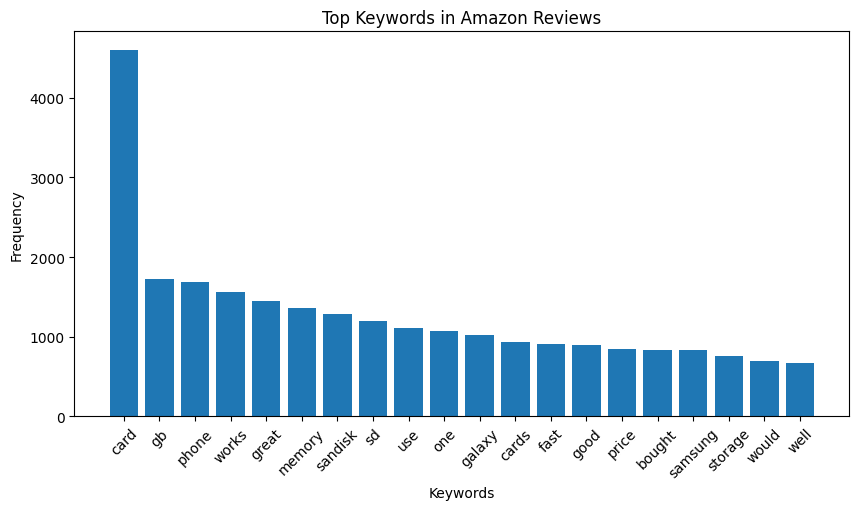

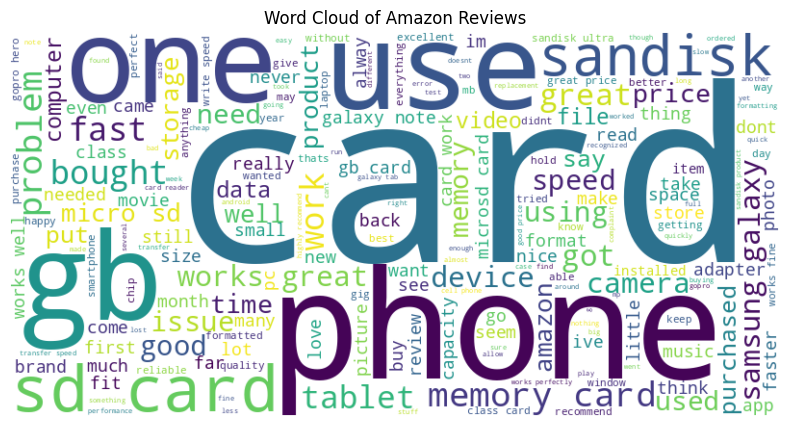

Top Keywords Extracted: ['bought' 'card' 'cards' 'fast' 'galaxy' 'gb' 'good' 'great' 'memory'
 'one' 'phone' 'price' 'samsung' 'sandisk' 'sd' 'storage' 'use' 'well'
 'works' 'would']


In [2]:
import pandas as pd
import nltk
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('stopwords')

# Load dataset
file_path = "amazon_review.csv"  # Update this with correct file path
df = pd.read_csv(file_path)

# Drop missing values in reviewText
df = df.dropna(subset=['reviewText'])

# Function to preprocess text (remove punctuation, stopwords, lowercase)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove leading/trailing spaces
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply text cleaning
df['cleaned_review'] = df['reviewText'].apply(clean_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=20)  # Extract top 20 words
tfidf_matrix = vectorizer.fit_transform(df['cleaned_review'])
keywords = vectorizer.get_feature_names_out()

# Count top words in dataset
all_words = ' '.join(df['cleaned_review']).split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(20)

# Visualize top keywords using a bar chart
plt.figure(figsize=(10,5))
plt.bar(*zip(*top_words))
plt.xticks(rotation=45)
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Top Keywords in Amazon Reviews")
plt.show()

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_review']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Amazon Reviews")
plt.show()

# Display extracted keywords
print("Top Keywords Extracted:", keywords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


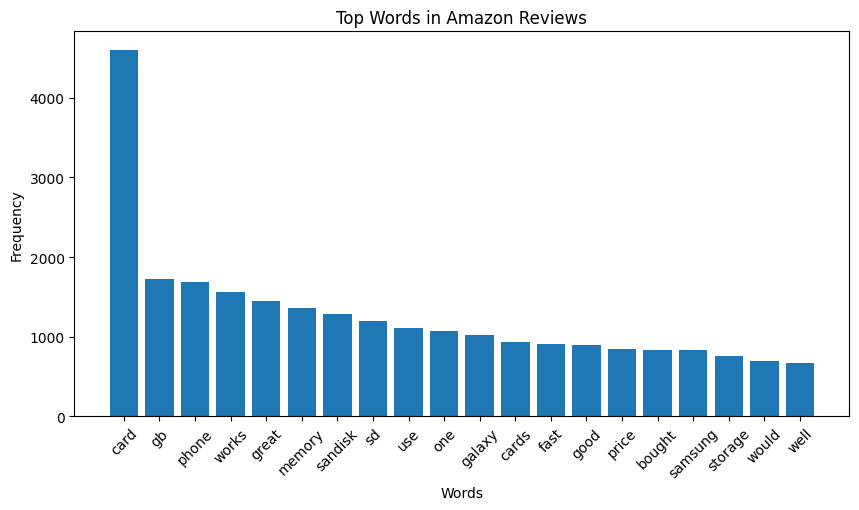

Top Bigrams: [(('sd', 'card'), 692), (('memory', 'card'), 536), (('samsung', 'galaxy'), 478), (('works', 'great'), 474), (('micro', 'sd'), 353), (('galaxy', 'note'), 273), (('gb', 'card'), 211), (('card', 'works'), 178), (('microsd', 'card'), 175), (('works', 'well'), 160)]


In [3]:
import pandas as pd
import nltk
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import islice

# Download necessary NLTK resources
nltk.download('stopwords')

# Load dataset
file_path = "amazon_review.csv"
df = pd.read_csv(file_path).dropna(subset=['reviewText'])

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return words

# Apply cleaning
df['cleaned_review'] = df['reviewText'].apply(clean_text)

# Word Frequency
all_words = [word for review in df['cleaned_review'] for word in review]
word_counts = Counter(all_words).most_common(20)

# Bigram Analysis
bigrams = list(nltk.bigrams(all_words))
bigram_counts = Counter(bigrams).most_common(20)

# Plot Most Frequent Words
plt.figure(figsize=(10,5))
plt.bar(*zip(*word_counts))
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Words in Amazon Reviews")
plt.show()

# Print Most Frequent Bigrams
print("Top Bigrams:", list(islice(bigram_counts, 10)))


In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Define aspects to analyze
aspects = ["quality", "shipping", "customer service", "price", "delivery"]

# Function to analyze sentiment per aspect
def aspect_sentiment(text):
    scores = {aspect: sia.polarity_scores(text)['compound'] for aspect in aspects if aspect in text}
    return scores if scores else None

df['aspect_sentiments'] = df['reviewText'].apply(aspect_sentiment)

# Show example aspect sentiments
df[['reviewText', 'aspect_sentiments']].dropna().head(10)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviewText,aspect_sentiments
4,"Bought it with Retail Packaging, arrived legit...",{'price': 0.7087}
13,Solid SDHC card that is fast (at reading and w...,{'price': 0.7425}
22,SanDisk never disappoints. As always SanDisk p...,{'quality': 0.9097}
23,"Good price, works flawless in my Samsung S4! N...","{'quality': 0.7772, 'price': 0.7772}"
24,San disk is hard to beat. You will pay more f...,{'quality': -0.1027}
31,I've been trying for a while to get a hold of ...,{'price': 0.9371}
34,I've got a couple of these in varying sizes. I...,{'price': -0.8895}
38,I bougth this micro SD card after some trubles...,{'quality': 0.9452}
41,I am very happy with this Micro SD. I could t...,{'price': 0.5182}
42,I've purchased several of these little babies ...,{'price': 0.7876}


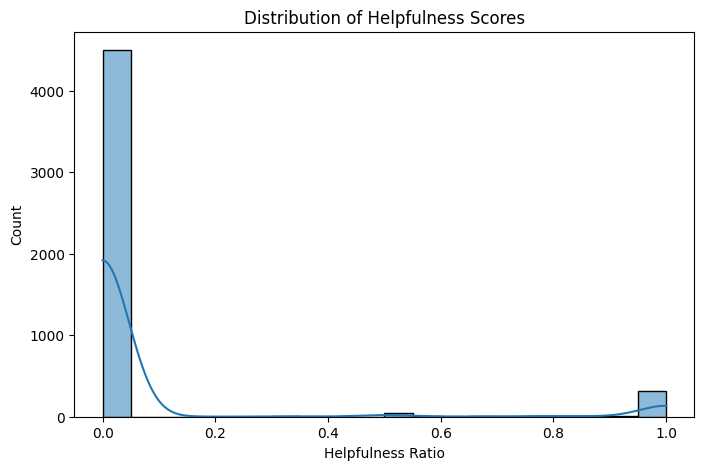

In [5]:
import seaborn as sns

# Convert helpful column to numeric
df['helpful_yes'] = pd.to_numeric(df['helpful_yes'])
df['total_vote'] = pd.to_numeric(df['total_vote'])

# Compute helpfulness ratio
df['helpfulness_ratio'] = df['helpful_yes'] / df['total_vote']
df['helpfulness_ratio'] = df['helpfulness_ratio'].fillna(0)

# Plot helpfulness distribution
plt.figure(figsize=(8,5))
sns.histplot(df['helpfulness_ratio'], bins=20, kde=True)
plt.title("Distribution of Helpfulness Scores")
plt.xlabel("Helpfulness Ratio")
plt.ylabel("Count")
plt.show()


<ipython-input-6-a966dff768d0>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')


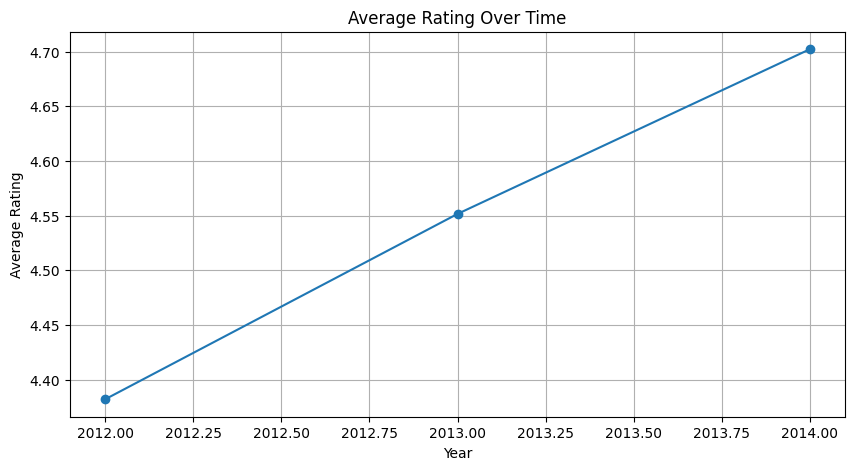

In [6]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')

# Group by year
df['year'] = df['reviewTime'].dt.year
yearly_reviews = df.groupby('year')['overall'].mean()

# Plot yearly trend
plt.figure(figsize=(10,5))
plt.plot(yearly_reviews.index, yearly_reviews.values, marker='o')
plt.title("Average Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid()
plt.show()


<ipython-input-7-411539f54f88>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['overall'], palette='coolwarm')


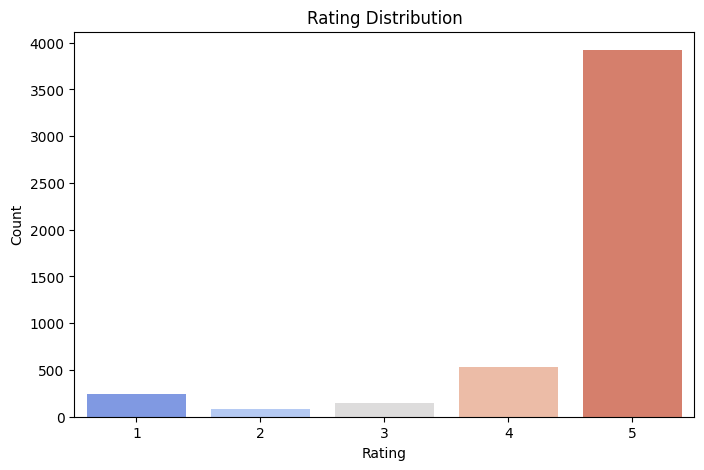

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['overall'], palette='coolwarm')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [9]:
df['review_length'] = df['reviewText'].apply(lambda x: len(str(x).split()))


Correlation between review length and rating: -0.27


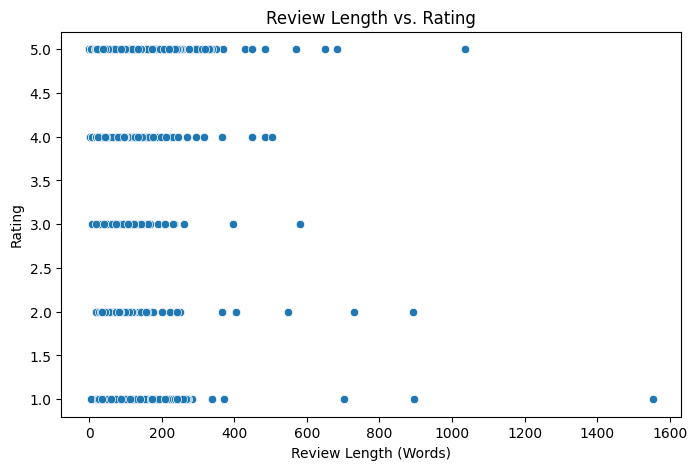

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
correlation = np.corrcoef(df['review_length'], df['overall'])[0,1]
print(f"Correlation between review length and rating: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['review_length'], y=df['overall'])
plt.title("Review Length vs. Rating")
plt.xlabel("Review Length (Words)")
plt.ylabel("Rating")
plt.show()


In [11]:
# Define fake review criteria
df['is_fake'] = (df['review_length'] < 5) | (df['overall'] == 5) & (df['helpful_yes'] == 0)

# Count fake reviews
num_fake_reviews = df['is_fake'].sum()
print(f"Potential Fake Reviews: {num_fake_reviews}")

# Show some detected fake reviews
df[df['is_fake']].head(10)


Potential Fake Reviews: 3667


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,cleaned_review,aspect_sentiments,helpfulness_ratio,year,review_length,is_fake
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4,Four Stars,1406073600,2014-07-23,138,0,0,[issues],None,0.0,2014,2,True
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,"[purchased, device, worked, advertised, never,...",None,0.0,2013,31,True
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,"[think, worked, greathad, diff, bran, gb, card...",None,0.0,2013,66,True
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5,best deal around,1373673600,2013-07-13,513,0,0,"[bought, retail, packaging, arrived, legit, or...",{'price': 0.7087},0.0,2013,52,True
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",It's mini storage. It doesn't do anything els...,5,Not a lot to really be said,1367193600,2013-04-29,588,0,0,"[mini, storage, doesnt, anything, else, suppos...",None,0.0,2013,51,True
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",I have it in my phone and it never skips a bea...,5,Works well,1382140800,2013-10-19,415,0,0,"[phone, never, skips, beat, file, transfers, s...",None,0.0,2013,75,True
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",It's hard to believe how affordable digital ha...,5,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,"[hard, believe, affordable, digital, become, g...",None,0.0,2014,58,True
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]","in my galaxy s4, super fast card, and am total...",5,works great,1381449600,2013-11-10,393,0,0,"[galaxy, super, fast, card, totally, happy, ha...",None,0.0,2013,23,True
10,A1RTQROTWR5NCB,B007WTAJTO,808TREX50,"[0, 0]",I like this SD Card because it can take music ...,5,32GB MicroSD Card.,1368230400,2013-11-05,398,0,0,"[like, sd, card, take, music, video, downloads...",None,0.0,2013,72,True
12,AN2VFTXYW1SZU,B007WTAJTO,9z4cda,"[0, 0]",THE NAME OF ITSELF SPEAKS OUT. GO SANDISK GO!,5,A RENOUND NAME BRAND,1404432000,2014-04-07,245,0,0,"[name, speaks, go, sandisk, go]",None,0.0,2014,9,True


<ipython-input-12-54333b3a050d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fake_review_counts.index, y=fake_review_counts.values, palette=["green", "red"])


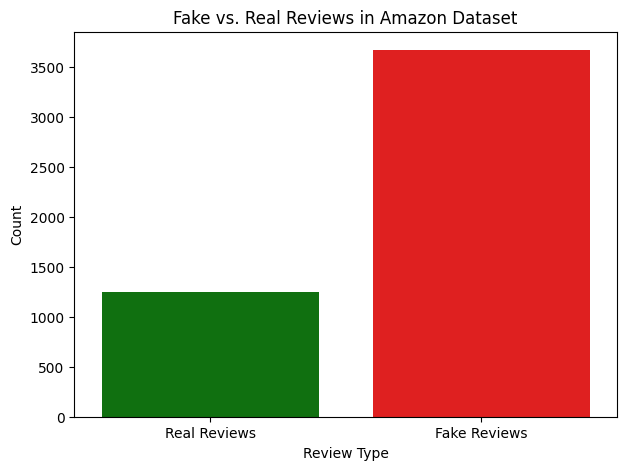

Sample Fake Reviews:


,reviewText,overall,helpful_yes,total_vote
0,No issues.,4,0,0
1,"Purchased this for my device, it worked as adv...",5,0,0
3,This think has worked out great.Had a diff. br...,5,0,0
4,"Bought it with Retail Packaging, arrived legit...",5,0,0
5,It's mini storage. It doesn't do anything els...,5,0,0
6,I have it in my phone and it never skips a bea...,5,0,0
7,It's hard to believe how affordable digital ha...,5,0,0
9,"in my galaxy s4, super fast card, and am total...",5,0,0
10,I like this SD Card because it can take music ...,5,0,0
12,THE NAME OF ITSELF SPEAKS OUT. GO SANDISK GO!,5,0,0


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Update file path if necessary)
file_path = "amazon_review.csv"  # Ensure the file is uploaded in Colab
df = pd.read_csv(file_path).dropna(subset=['reviewText'])

# Ensure review_length column exists
df['review_length'] = df['reviewText'].apply(lambda x: len(str(x).split()))

# Convert helpfulness votes to numeric (handling missing values)
df['helpful_yes'] = pd.to_numeric(df['helpful_yes'], errors='coerce').fillna(0)
df['total_vote'] = pd.to_numeric(df['total_vote'], errors='coerce').fillna(0)

# Define fake review criteria
df['is_fake'] = (df['review_length'] < 5) | ((df['overall'] == 5) & (df['helpful_yes'] == 0))

# Count fake and real reviews
fake_review_counts = df['is_fake'].value_counts()

# Plot Fake vs. Real Reviews
plt.figure(figsize=(7, 5))
sns.barplot(x=fake_review_counts.index, y=fake_review_counts.values, palette=["green", "red"])
plt.xticks(ticks=[0, 1], labels=["Real Reviews", "Fake Reviews"])
plt.xlabel("Review Type")
plt.ylabel("Count")
plt.title("Fake vs. Real Reviews in Amazon Dataset")
plt.show()

# Display some fake reviews for inspection
print("Sample Fake Reviews:")
df[df['is_fake']].head(10)[['reviewText', 'overall', 'helpful_yes', 'total_vote']]
